In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

In [2]:
users = pd.read_csv("SELECT_u_name__ST_X_chap_location__geome.csv", 
                    header = None, names = ["user", "long", "lat"])

In [3]:
edges = pd.read_csv("SELECT_Z_auth_A__Z_auth_B__sum_1__as_cnt.csv")

In [4]:
users.head()

,user,long,lat
0,dollarmapper,11.151678,7.655859
1,muhaammaadd,11.151678,7.655859
2,hauwa_u,11.151678,7.655859
3,kenbayona,-6.766168,39.215414
4,ayebare lucky,0.547058,34.020155


In [5]:
edges.head()

,auth_a,auth_b,cnt
0,--t7tr--,danielzyt,4962
1,--t7tr--,hills95,9744
2,--t7tr--,kiggudde,107
3,--t7tr--,livasa,237
4,--t7tr--,mugabi henry,12


In [6]:
#edges_users = pd.merge(edges, users, 
#         left_on = "auth_a",
#         right_on = "user")\
#.drop("user", axis = 1)

In [7]:
G = nx.DiGraph()

In [8]:
# Only add edges that would have counts > 1000
edge_tuples = [tuple(x) for x in edges.values 
               if x[-1] > 1000]

In [9]:
G.add_weighted_edges_from(edge_tuples)

In [10]:
options = {
    "node_color": "green",
    "node_size": 100,
    "width": 5,
    "alpha": 0.5
}

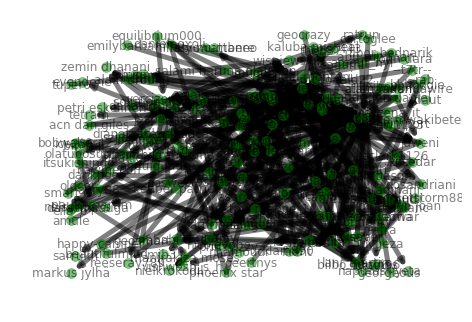

In [11]:
nx.draw_random(G, **options, with_labels = True)
#plt.savefig("full_user_network.png")

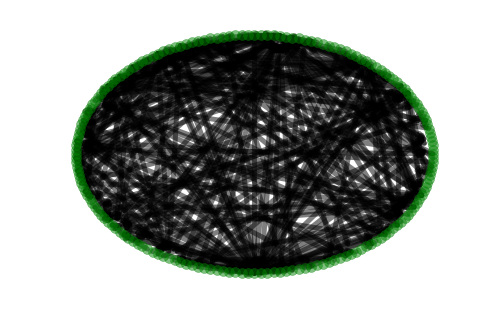

In [12]:
nx.draw_circular(G, **options)

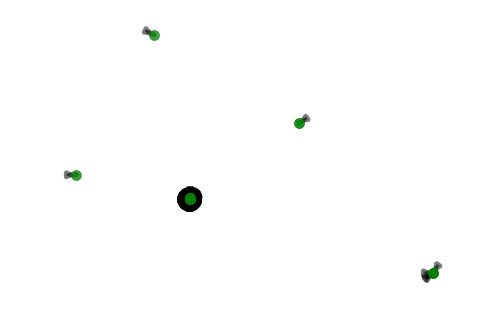

In [26]:
nx.draw_spectral(G, **options)

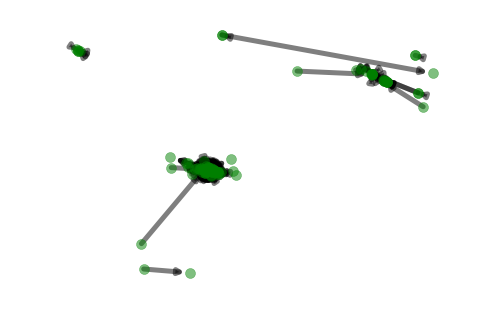

In [22]:
nx.draw_kamada_kawai(G, **options)

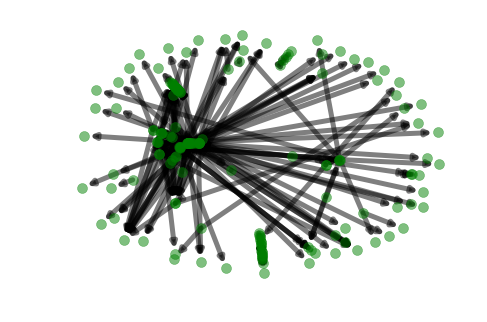

In [23]:
nx.draw_spring(G, **options)

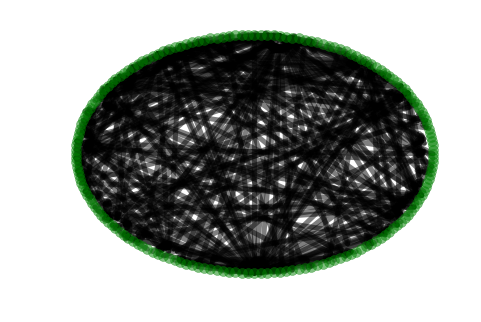

In [24]:
nx.draw_shell(G, **options)

In [14]:
auth_a1_net = edges.loc[edges.auth_a == "--t7tr--", 
                       edges.columns[:2]]

In [15]:
auth_a1_nodes = (auth_a1_net.auth_a.append(auth_a1_net.auth_b)).unique()

In [16]:
auth_a1_nodes

array(['--t7tr--', 'danielzyt', 'hills95', 'kiggudde', 'livasa',
       'mugabi henry', 'nicoleyohe', 'tetram'], dtype=object)

In [17]:
sub_G = G.subgraph(auth_a1_nodes)

In [18]:
sub_G.edges()

OutEdgeView([('hills95', 'tetram'), ('hills95', 'kiggudde'), ('hills95', 'mugabi henry'), ('--t7tr--', 'danielzyt'), ('--t7tr--', 'hills95'), ('danielzyt', 'nicoleyohe'), ('danielzyt', 'kiggudde'), ('danielzyt', 'hills95'), ('danielzyt', 'mugabi henry')])

In [19]:
sub_G_edges, sub_G_weights = zip(*nx.get_edge_attributes(sub_G,'weight').items())

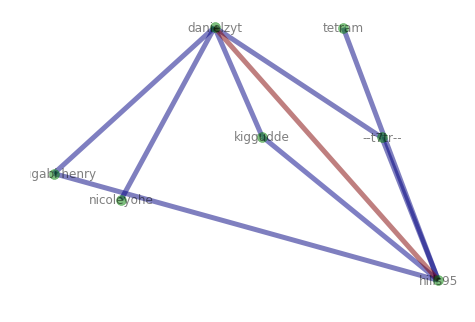

In [20]:
nx.draw_random(sub_G, **options,
               with_labels = True,
               edgelist = sub_G_edges,
               edge_color = sub_G_weights,
               edge_cmap = plt.cm.jet,
               arrows = False)
#plt.savefig("subgraph_with_--t7tr--.png")